In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

# Data Loading

In [2]:
data = pd.read_csv("/home/student/Alpha/dataset3.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data["Chance of Admit "]>=0.87

0       True
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397     True
398    False
399     True
Name: Chance of Admit , Length: 400, dtype: bool

### Inserting Admitted Column

In [5]:
data.insert(9,"Admitted",data["Chance of Admit "]>=0.87)

In [6]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,False
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,False
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,False
396,397,325,107,3,3.0,3.5,9.11,1,0.84,False
397,398,330,116,4,5.0,4.5,9.45,1,0.91,True
398,399,312,103,3,3.5,4.0,8.78,0,0.67,False


### Dropping Columns

In [7]:
data1 = data.drop(columns=["Serial No.","Chance of Admit "])

In [8]:
data1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,True
1,324,107,4,4.0,4.5,8.87,1,False
2,316,104,3,3.0,3.5,8.00,1,False
3,322,110,3,3.5,2.5,8.67,1,False
4,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,False
396,325,107,3,3.0,3.5,9.11,1,False
397,330,116,4,5.0,4.5,9.45,1,True
398,312,103,3,3.5,4.0,8.78,0,False


# Preprocessing

### Checking Null Values

In [9]:
data1.isna()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


In [10]:
data1.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64

### Checking Zeroes

In [11]:
data1==0

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,True
396,False,False,False,False,False,False,False,True
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,True,True


In [12]:
data1[data1==0].count()

GRE Score              0
TOEFL Score            0
University Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research             181
Admitted             325
dtype: int64

In [13]:
data1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,True
1,324,107,4,4.0,4.5,8.87,1,False
2,316,104,3,3.0,3.5,8.00,1,False
3,322,110,3,3.5,2.5,8.67,1,False
4,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,False
396,325,107,3,3.0,3.5,9.11,1,False
397,330,116,4,5.0,4.5,9.45,1,True
398,312,103,3,3.5,4.0,8.78,0,False


## Changing Categorical data to Numerical data

In [14]:
data1.replace([True,False],[1,0],inplace=True)

In [15]:
data1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0
396,325,107,3,3.0,3.5,9.11,1,0
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


## Plotting

### ScatterPlot

<AxesSubplot:xlabel='SOP', ylabel='University Rating'>

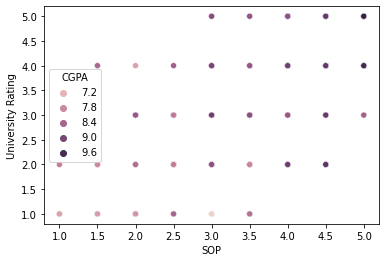

In [16]:
import seaborn as sns
sns.scatterplot(data=data1,x="SOP",y="University Rating",hue="CGPA")

<AxesSubplot:xlabel='CGPA', ylabel='TOEFL Score'>

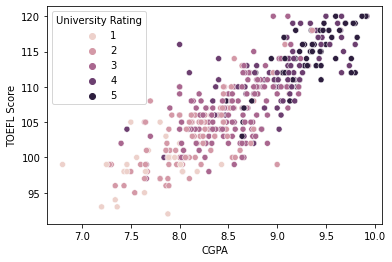

In [17]:
sns.scatterplot(data=data1, x="CGPA", y="TOEFL Score",hue="University Rating")

<AxesSubplot:xlabel='CGPA', ylabel='University Rating'>

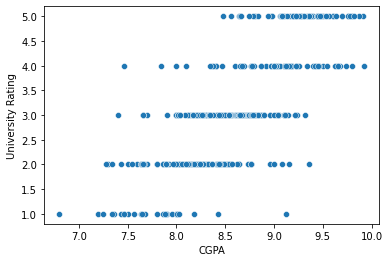

In [18]:
sns.scatterplot(data=data1, x="CGPA", y="University Rating")

### Bar Graph

<AxesSubplot:xlabel='SOP', ylabel='University Rating'>

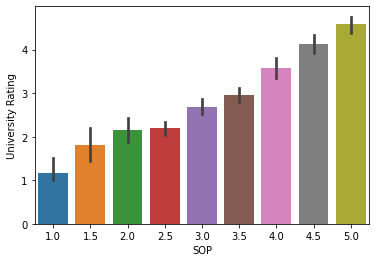

In [19]:
sns.barplot(data=data1,x="SOP",y="University Rating")

<AxesSubplot:xlabel='Research', ylabel='TOEFL Score'>

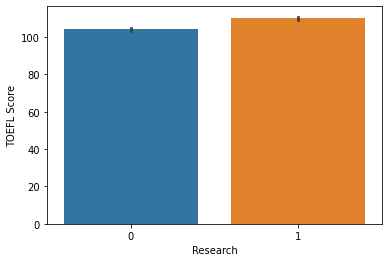

In [20]:
sns.barplot(data=data1,y="TOEFL Score",x="Research")

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

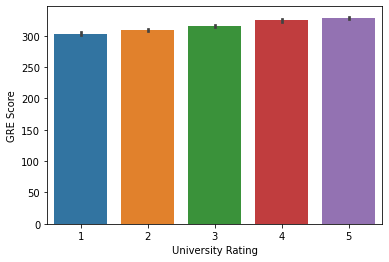

In [21]:
sns.barplot(data=data1,y="GRE Score",x="University Rating")

### Distributed Plot

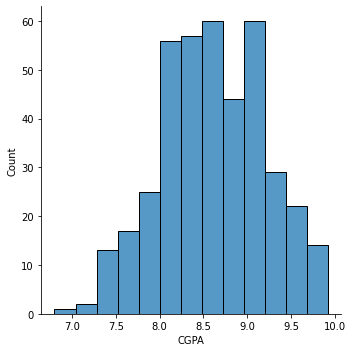

In [22]:
#kind = hist
sns.displot(data=data1, x="CGPA")

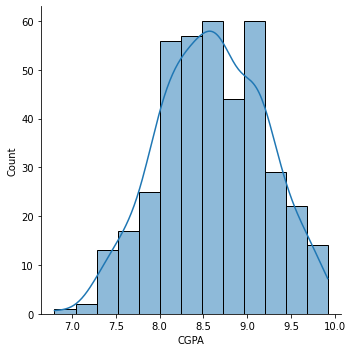

In [23]:
sns.displot(data=data1, x="CGPA",kde=True)

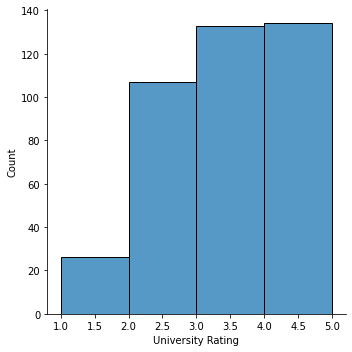

In [24]:
sns.displot(data=data1, x="University Rating",bins=4)

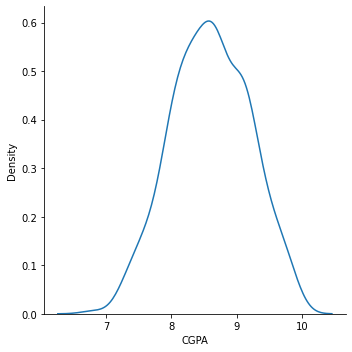

In [25]:
#kind kde
sns.displot(data=data1, x="CGPA",kind="kde")

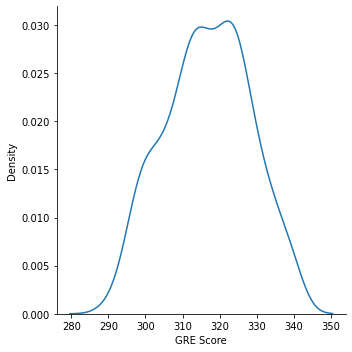

In [26]:
sns.displot(data=data1, x="GRE Score",kind="kde")

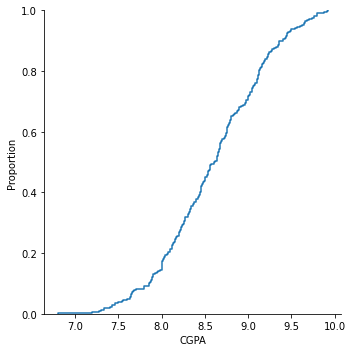

In [27]:
#ecdf kind
sns.displot(data=data1, x="CGPA",kind="ecdf")

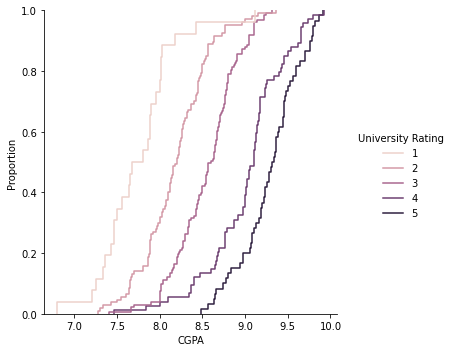

In [28]:
sns.displot(data=data1, x="CGPA",kind="ecdf",hue="University Rating")

## Train Test Split

In [29]:
x=data1[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]]

In [30]:
y= data1[["Admitted"]]

In [31]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [32]:
y

,Admitted
0,1
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,1
398,0


## Train Test Split

In [33]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [35]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
276,329,113,5,5.0,4.5,9.45,1
95,304,100,4,1.5,2.5,7.84,0
50,313,98,3,2.5,4.5,8.30,1
104,326,112,3,3.5,3.0,9.05,1
67,316,107,2,3.5,3.5,8.64,1
...,...,...,...,...,...,...,...
248,324,110,3,3.5,4.0,8.87,1
372,336,119,4,4.5,4.0,9.62,1
71,336,112,5,5.0,5.0,9.76,1
352,303,100,2,3.0,3.5,8.06,1


In [36]:
y_train

,Admitted
276,1
95,0
50,0
104,0
67,0
...,...
248,0
372,1
71,1
352,0


In [37]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
282,312,106,3,4.0,3.5,8.79,1
355,317,106,2,2.0,3.5,8.12,0
211,328,110,4,5.0,4.0,9.14,1
258,326,102,4,5.0,5.0,8.76,1
238,310,104,3,2.0,3.5,8.37,0
...,...,...,...,...,...,...,...
165,322,110,5,4.5,4.0,8.97,0
272,294,95,1,1.5,1.5,7.64,0
5,330,115,5,4.5,3.0,9.34,1
94,303,99,3,2.0,2.5,7.66,0


In [38]:
y_test

,Admitted
282,0
355,0
211,0
258,0
238,0
...,...
165,0
272,0
5,1
94,0


# Decision Tree by Gini Index

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
d = DecisionTreeClassifier(criterion="gini")

In [41]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_predict=d.predict(x_test)

In [43]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [83]:
d.predict([[305,105,2,3.0,2.0,8.23,0]])


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [84]:
d1 = pd.DataFrame({"GRE Score":[337],
                  "TOEFL Score":[118],
                  "University Rating":[4],
                  "SOP":[4.5],
                  "LOR":[4.5],
                  "CGPA":[9.65],
                  "Research":[1]})

In [85]:
pre = d.predict(d1)
if pre==1:
    print("Admitted")
else:
    print("Not Admitted")

Admitted


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- LOR
Feature names seen at fit time, yet now missing:
- LOR 

  warnings.warn(message, FutureWarning)


In [87]:
d2 = pd.DataFrame({"GRE Score":[324],
                  "TOEFL Score":[107],
                  "University Rating":[4],
                  "SOP":[4.0],
                  "LOR":[4.5],
                  "CGPA":[8.87],
                  "Research":[1]})

In [88]:
pre = d.predict(d2)
if pre==1:
    print("Admitted")
else:
    print("Not Admitted")

Not Admitted


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- LOR
Feature names seen at fit time, yet now missing:
- LOR 

  warnings.warn(message, FutureWarning)


## Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_predict,y_test)

array([[83,  1],
       [ 3, 13]])

In [47]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(d, y_test, y_predict) 
#plt.show()

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_predict)

0.96

#### Precision

In [50]:
from sklearn.metrics import precision_score

In [51]:
precision_score(y_test,y_predict)

0.8125

#### Recall

In [52]:
from sklearn.metrics import recall_score

In [53]:
recall_score(y_test,y_predict)

0.9285714285714286

# Decision Tree by Entropy

In [54]:
d2 = DecisionTreeClassifier(criterion="entropy")

In [55]:
d2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
y_predicted=d.predict(x_test)

In [57]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [58]:
d2.predict([[305,105,2,3.0,2.0,8.23,0]])
if(d2.predict==0)
    

/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Confusion Matrix

In [59]:
confusion_matrix(y_test,y_predicted)

array([[83,  3],
       [ 1, 13]])

#### Recall

In [60]:
recall_score(y_test,y_predicted)

0.9285714285714286

#### Precision

In [61]:
precision_score(y_test,y_predicted)

0.8125

#### Accuracy

In [62]:
accuracy_score(y_test,y_predicted)

0.96

# Decision Tree

In [63]:
from sklearn import tree

##### Tree Using Gini Index

[Text(0.5416666666666666, 0.9285714285714286, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7857142857142857, 'X[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.6428571428571429, 'X[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.5, 'X[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.35714285714285715, 'gini = 0.0\nsamples = 198\nvalue = [198, 0]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[5] <= 8.985\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.1111111111111111, 0.21428571428571427, 'X[3] <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2222222222222222, 0.21428571428571427, 'gini = 0.0\nsamples = 28\nva

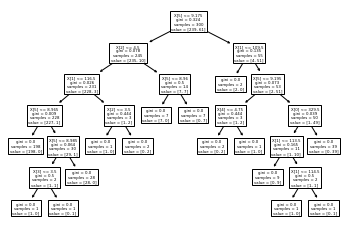

In [64]:
tree.plot_tree(d)

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7222222222222222, 0.7, 'X[1] <= 109.5\ngini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(0.6

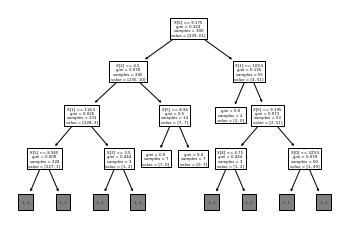

In [65]:
tree.plot_tree(d,max_depth=3)

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4444444444444444, 0.3, 'samples = 7\nvalue = [7, 0]'),
 Text(0.5555555555555556, 0.3, 'samples = 7\nvalue = [0, 7]'),
 Text(0.7222222222222222, 0.7, 'X[1] <= 109.5\nsamples = 55\nvalue = [4, 51]'),
 Text(0.6666666666666666, 0.5, 'samples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.5, 'X[5] <= 9.195\nsamples = 53\nvalue

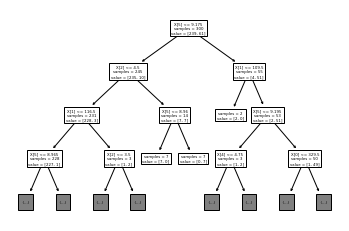

In [66]:
tree.plot_tree(d,max_depth=3,impurity=False)

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7222222222222222, 0.7, 'X[1] <= 109.5\ngini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(0.6

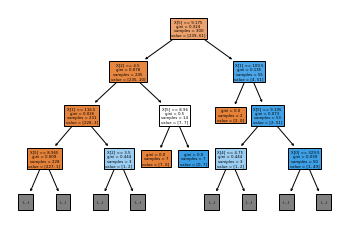

In [67]:
tree.plot_tree(d,max_depth=3,filled=True)

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\n0.078\n245\n[235, 10]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\n0.026\n231\n[228, 3]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\n0.009\n228\n[227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\n0.444\n3\n[1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\n0.5\n14\n[7, 7]'),
 Text(0.4444444444444444, 0.3, '0.0\n7\n[7, 0]'),
 Text(0.5555555555555556, 0.3, '0.0\n7\n[0, 7]'),
 Text(0.7222222222222222, 0.7, 'X[1] <= 109.5\n0.135\n55\n[4, 51]'),
 Text(0.6666666666666666, 0.5, '0.0\n2\n[2, 0]'),
 Text(0.7777777777777778, 0.5, 'X[5] <= 9.195\n0.073\n53\n[2, 51]'),
 Text(0.6666666666666666, 0.3, 'X[4] <= 4.75\n0.444\n3\n[1, 2]'),
 Text(0.6111111111111112

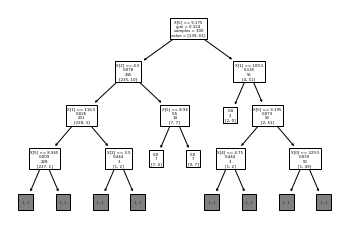

In [68]:
tree.plot_tree(d,max_depth=3,label='root')

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7222222222222222, 0.7, 'X[1] <= 109.5\ngini = 0.135\nsamples = 55\nvalue = [4, 51]'),
 Text(0.6

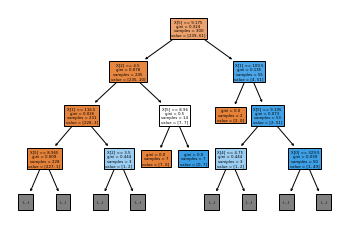

In [69]:
tree.plot_tree(d,max_depth=3,label='all',filled=True)

[Text(0.5416666666666666, 0.9166666666666666, 'X[5] <= 9.175\n0.324\n300\n[239, 61]'),
 Text(0.3611111111111111, 0.75, 'X[2] <= 4.5\n0.078\n245\n[235, 10]'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[1] <= 116.5\n0.026\n231\n[228, 3]'),
 Text(0.1111111111111111, 0.4166666666666667, 'X[5] <= 8.965\n0.009\n228\n[227, 1]'),
 Text(0.05555555555555555, 0.25, '0.0\n198\n[198, 0]'),
 Text(0.16666666666666666, 0.25, 'X[5] <= 8.985\n0.064\n30\n[29, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2222222222222222, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[2] <= 3.5\n0.444\n3\n[1, 2]'),
 Text(0.2777777777777778, 0.25, '0.0\n1\n[1, 0]'),
 Text(0.3888888888888889, 0.25, '0.0\n2\n[0, 2]'),
 Text(0.5, 0.5833333333333334, 'X[5] <= 8.96\n0.5\n14\n[7, 7]'),
 Text(0.4444444444444444, 0.4166666666666667, '0.0\n7\n[7, 0]'),
 Text(0.5555555555555556, 0.4166666666666667, '0.0\n7\n[0, 7]'),
 Text(0.7222222222222222, 0.75, 'X[1

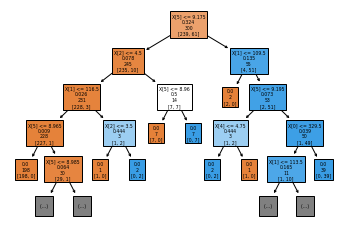

In [70]:
tree.plot_tree(d,max_depth=4,label='none',filled=True)

[Text(0.5416666666666666, 0.9, 'node #0\nX[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3611111111111111, 0.7, 'node #1\nX[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]'),
 Text(0.2222222222222222, 0.5, 'node #2\nX[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]'),
 Text(0.1111111111111111, 0.3, 'node #3\nX[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'node #10\nX[2] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'node #13\nX[5] <= 8.96\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.4444444444444444, 0.3, 'node #14\ngini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5555555555555556, 0.3, 'node #15\ngini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7222222222222222, 0

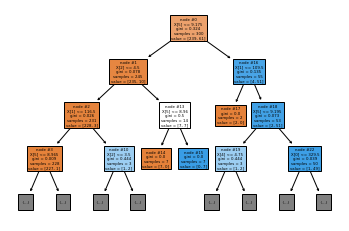

In [71]:
tree.plot_tree(d,max_depth=3,label='all',filled=True,node_ids=True)

[Text(0.5416666666666666, 0.9, 'X[5] <= 9.175\ngini = 0.324\nsamples = 300\nvalue = [239, 61]\nclass = y[0]'),
 Text(0.3611111111111111, 0.7, 'X[2] <= 4.5\ngini = 0.078\nsamples = 245\nvalue = [235, 10]\nclass = y[0]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 116.5\ngini = 0.026\nsamples = 231\nvalue = [228, 3]\nclass = y[0]'),
 Text(0.1111111111111111, 0.3, 'X[5] <= 8.965\ngini = 0.009\nsamples = 228\nvalue = [227, 1]\nclass = y[0]'),
 Text(0.05555555555555555, 0.1, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'X[2] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = y[1]'),
 Text(0.2777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.3888888888888889, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'X[5] <= 8.96\ngini = 0.5\nsamples = 14\nvalue = [7, 7]\nclass = y[0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = y[0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass =

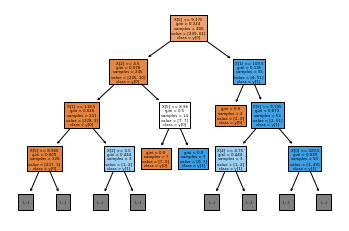

In [72]:
tree.plot_tree(d,max_depth=3,label='all',filled=True,class_names=True)

#### Decision Tree by Entropy

[Text(0.5769230769230769, 0.9285714285714286, 'X[5] <= 9.175\nentropy = 0.729\nsamples = 300\nvalue = [239, 61]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[5] <= 8.965\nentropy = 0.246\nsamples = 245\nvalue = [235, 10]'),
 Text(0.3076923076923077, 0.6428571428571429, 'entropy = 0.0\nsamples = 205\nvalue = [205, 0]'),
 Text(0.46153846153846156, 0.6428571428571429, 'X[2] <= 4.5\nentropy = 0.811\nsamples = 40\nvalue = [30, 10]'),
 Text(0.38461538461538464, 0.5, 'X[1] <= 116.5\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]'),
 Text(0.23076923076923078, 0.35714285714285715, 'X[5] <= 8.985\nentropy = 0.211\nsamples = 30\nvalue = [29, 1]'),
 Text(0.15384615384615385, 0.21428571428571427, 'X[4] <= 3.75\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.21428571428571427, 'e

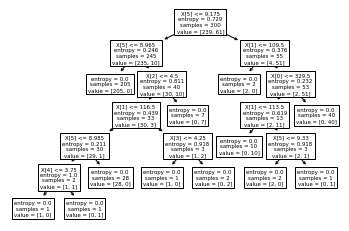

In [73]:
tree.plot_tree(d2)

[Text(0.5416666666666666, 0.9166666666666666, 'X[5] <= 9.175\nentropy = 0.729\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3333333333333333, 0.75, 'X[5] <= 8.965\nentropy = 0.246\nsamples = 245\nvalue = [235, 10]'),
 Text(0.25, 0.5833333333333334, 'entropy = 0.0\nsamples = 205\nvalue = [205, 0]'),
 Text(0.4166666666666667, 0.5833333333333334, 'X[2] <= 4.5\nentropy = 0.811\nsamples = 40\nvalue = [30, 10]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[1] <= 116.5\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]'),
 Text(0.16666666666666666, 0.25, 'X[5] <= 8.985\nentropy = 0.211\nsamples = 30\nvalue = [29, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.25, 'X[3] <= 4.25\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4166666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.4166666666666667, 'entropy = 0.0\nsampl

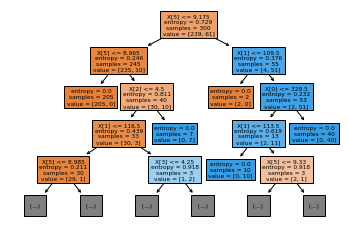

In [74]:
tree.plot_tree(d2,max_depth=4,filled=True)

[Text(0.4444444444444444, 0.9, 'X[5] <= 9.175\nentropy = 0.729\nsamples = 100.0%\nvalue = [0.797, 0.203]'),
 Text(0.2222222222222222, 0.7, 'X[5] <= 8.965\nentropy = 0.246\nsamples = 81.7%\nvalue = [0.959, 0.041]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 68.3%\nvalue = [1.0, 0.0]'),
 Text(0.3333333333333333, 0.5, 'X[2] <= 4.5\nentropy = 0.811\nsamples = 13.3%\nvalue = [0.75, 0.25]'),
 Text(0.2222222222222222, 0.3, 'X[1] <= 116.5\nentropy = 0.439\nsamples = 11.0%\nvalue = [0.909, 0.091]'),
 Text(0.1111111111111111, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 2.3%\nvalue = [0.0, 1.0]'),
 Text(0.6666666666666666, 0.7, 'X[1] <= 109.5\nentropy = 0.376\nsamples = 18.3%\nvalue = [0.073, 0.927]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 0.7%\nvalue = [1.0, 0.0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 329.5\nentropy = 0.232\nsamples = 17.7%\nvalue = [0.038, 0.962]'),
 Text(0

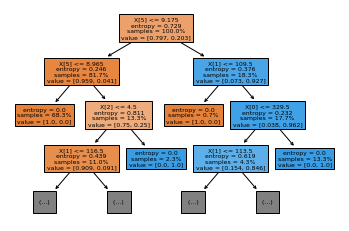

In [75]:
tree.plot_tree(d2,max_depth=3,filled=True,proportion=True)

[Text(0.5416666666666666, 0.9166666666666666, 'X[5] <= 9.175\nentropy = 0.729\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3333333333333333, 0.75, 'X[5] <= 8.965\nentropy = 0.246\nsamples = 245\nvalue = [235, 10]'),
 Text(0.25, 0.5833333333333334, 'entropy = 0.0\nsamples = 205\nvalue = [205, 0]'),
 Text(0.4166666666666667, 0.5833333333333334, 'X[2] <= 4.5\nentropy = 0.811\nsamples = 40\nvalue = [30, 10]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[1] <= 116.5\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]'),
 Text(0.16666666666666666, 0.25, 'X[5] <= 8.985\nentropy = 0.211\nsamples = 30\nvalue = [29, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.25, 'X[3] <= 4.25\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4166666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.4166666666666667, 'entropy = 0.0\nsampl

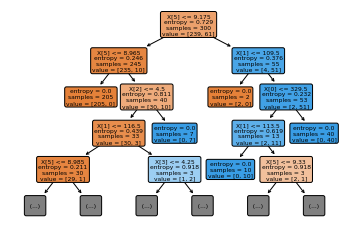

In [76]:
tree.plot_tree(d2,max_depth=4,filled=True,rounded=True)

[Text(0.5416666666666666, 0.9166666666666666, 'X[5] <= 9.175\nentropy = 0.729\nsamples = 300\nvalue = [239, 61]'),
 Text(0.3333333333333333, 0.75, 'X[5] <= 8.965\nentropy = 0.246\nsamples = 245\nvalue = [235, 10]'),
 Text(0.25, 0.5833333333333334, 'entropy = 0.0\nsamples = 205\nvalue = [205, 0]'),
 Text(0.4166666666666667, 0.5833333333333334, 'X[2] <= 4.5\nentropy = 0.811\nsamples = 40\nvalue = [30, 10]'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[1] <= 116.5\nentropy = 0.439\nsamples = 33\nvalue = [30, 3]'),
 Text(0.16666666666666666, 0.25, 'X[5] <= 8.985\nentropy = 0.211\nsamples = 30\nvalue = [29, 1]'),
 Text(0.08333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.25, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.25, 'X[3] <= 4.25\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4166666666666667, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.5, 0.4166666666666667, 'entropy = 0.0\nsampl

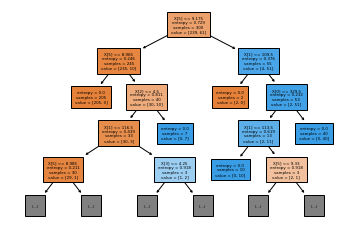

In [77]:
tree.plot_tree(d2,max_depth=4,filled=True,fontsize=4)